In [24]:
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path
import sys

In [4]:
# we store the directory containing the data in data_dir:
data_dir = Path(".") / "data"

In [5]:
# read_edgelist() function creates a Graph class from the edge list file,
G = nx.read_edgelist(f"{data_dir}/example.edgelist")

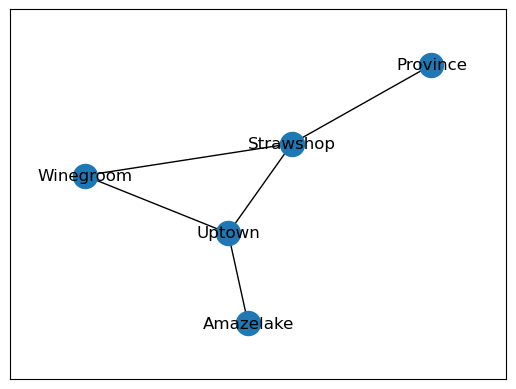

In [6]:
# visualize this network 
# In addition to using draw_networkx() to draw the G network, 
# we add padding to the margins to make extra room for the node labels.
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

In [7]:
# Notice that NetworkX assumed the edge 
# list represents an undirected network and returned a Graph class accordingly. 
# If a network is directed, the read_edgelist() function can also return a DiGraph class. 
# The only necessary change is that the DiGraph class must be passed as the 
# create_using parameter. For directed networks, the first node on each line 
# of the edge list will be interpreted as the source and the second as the target.

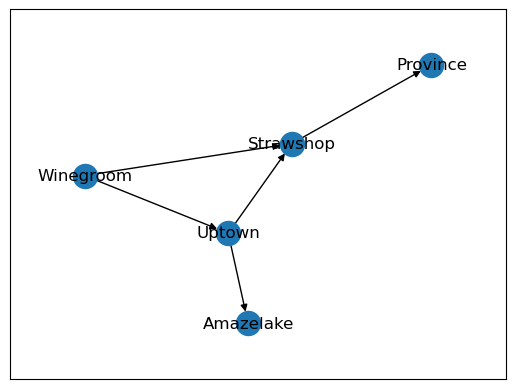

In [11]:
# Read edge list
G = nx.read_edgelist(f"{data_dir}/example.edgelist",
                     create_using=nx.DiGraph)

# Draw network
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

In [12]:
# The edge list format also supports weighted edges. 
# Edge weights can be specified by adding a number as the third entry 
# on each line of the edge list and using read_weighted_edgelist() to read the file. 
# The weight will automatically be added to an edge attribute called weight

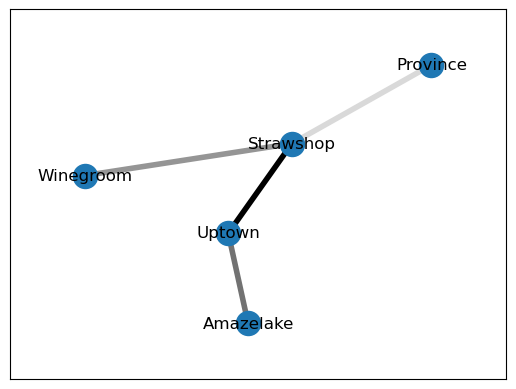

In [13]:
# Read edge list
G = nx.read_weighted_edgelist(f"{data_dir}/weighted.edgelist")

# Extract weights
weights = [d['weight'] for s, t, d in G.edges(data=True)]

# Draw network
nx.draw_networkx(G, pos, width=4, edge_color=weights, edge_cmap=plt.cm.Greys)
plt.gca().margins(0.15, 0.15)

In [14]:
# In addition to weights, the edge list format supports specifying additional attributes 
# for each edge (but not for nodes). Attributes are simply appended to each line of the 
# edge list. 

# hese attributes can be read with either read_edgelist() or read_weighted_edgelist() 
# by passing the data parameter. This parameter must be a list of 2-tuples. 
# Each tuple is used by NetworkX to parse one of the attributes in order. 
# The first element of each tuple is a string that tells NetworkX which attribute to set. 
# The second element is an object constructor used to create edge attributes. 
# Often these constructors are built-in Python classes (str, int, float, and so on), 
# but they can be any object constructor that accepts a string parameter. 
# The next example shows how to read the attributes from the preceding edge list 
# and draws the subway network with edges colored according to their color attribute. 
# Note that weight can be handled like any other attribute if you use read_edgelist() 
# rather than read_weighted_edgelist()

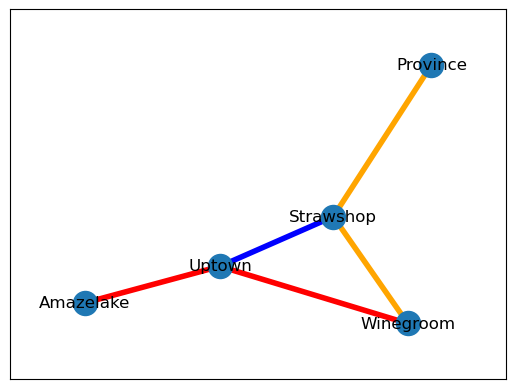

In [17]:
# Read edge list
G = nx.read_edgelist(f"{data_dir}/attributes.edgelist",
                     data=[('weight', float), ('color', str)])

# Extract colors
colors = [d['color'] for s, t, d in G.edges(data=True)]

# Draw network
nx.draw_networkx(G, width=4, edge_color=colors)
plt.gca().margins(0.15, 0.15)

In [ ]:
# Sometimes attributes aren't necessary and it's convenient to 
# have a simple, compact, plain-text representation of a network. 
# In these cases, the adjacency list format is a good alternative to edge lists. 
# In an adjacency list file, multiple nodes are listed on each line. 
# NetworkX creates an edge from the first node on each line to each of the 
# subsequent nodes on that line. As with edge lists, 
# these edges can be directed or undirected. One of the benefits to the adjacency 
# list format is brevity. Most edges can be specified by adding a single term, 
# rather than two. The drawback is the inability to specify edge attributes.

In [18]:
# Read adjacency list
G = nx.read_adjlist(f"{data_dir}/example.adjlist")

In [21]:
# NetworkX also supports the export of networks in edge list and adjacency list format. 
# The write_edgelist() and write_adjlist() functions can be used to do so. 
# All you need to do is pass a Graph class, DiGraph class,or other 
# NetworkX network object and specify the pathname
nx.write_edgelist(G, "out.edgelist")
nx.write_adjlist(G, "out.adjlist")

In [22]:
# The following code adds an abbreviation attribute to each node:
for v in G.nodes:
    G.nodes[v]['abbreviation'] = v[0]

In [23]:
for v in G.nodes:
    print(G.nodes[v]['abbreviation'])

W
U
S
A
P


In [26]:
# One useful format for working with node attributes is GEXF. 
# GEXF is an XML-based format that is also used by other free/open-source network tools, 
# such as the Gephi visualization application. The added complexity of the 
# GEXF format makes it possible for node and edge attributes to be handled 
# automatically by read_gexf() and write_gexf().
nx.write_gexf(G, "out.gefx")

In [27]:
# Finally, there are also several JSON-based formats available in NetworkX. 
# These formats also support node attributes. In addition to being considerably 
# more compact than GEXF, these formats are very convenient when working with 
# JavaScript or ECMAScript, for example, when using the d3.js visualization library.
nx.node_link_data(G)

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'abbreviation': 'W', 'id': 'Winegroom'},
  {'abbreviation': 'U', 'id': 'Uptown'},
  {'abbreviation': 'S', 'id': 'Strawshop'},
  {'abbreviation': 'A', 'id': 'Amazelake'},
  {'abbreviation': 'P', 'id': 'Province'}],
 'links': [{'source': 'Winegroom', 'target': 'Uptown'},
  {'source': 'Winegroom', 'target': 'Strawshop'},
  {'source': 'Uptown', 'target': 'Strawshop'},
  {'source': 'Uptown', 'target': 'Amazelake'},
  {'source': 'Strawshop', 'target': 'Province'}]}